In [1]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"]='3'# 只显示 Error 

In [2]:
from polaristatscn import stats,reports,utils ,plots
import pandas as pd
import pymongo
import akshare as ak

In [3]:
stock_df = ak.stock_zh_a_hist(
                        symbol="600000",
                        period="daily",
                        start_date="20170301",
                        end_date='20210907',
                        adjust="hfq")
stock_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017-03-01,99.91,99.81,100.11,99.61,162270,268840224.0,0.50,-0.15,-0.15,0.08
1,2017-03-02,100.11,99.05,100.11,98.95,189966,312626384.0,1.16,-0.76,-0.76,0.09
2,2017-03-03,99.10,98.74,99.15,98.59,124295,203315662.0,0.57,-0.31,-0.31,0.06
3,2017-03-06,98.85,99.05,99.66,98.74,157038,258165904.0,0.93,0.31,0.31,0.08
4,2017-03-07,98.90,99.15,99.25,98.85,93198,152969168.0,0.40,0.10,0.10,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1100,2021-09-01,86.45,87.44,87.77,86.32,582113,532088400.0,1.67,0.99,0.86,0.20
1101,2021-09-02,87.57,87.77,87.84,87.31,401227,369226848.0,0.61,0.38,0.33,0.14
1102,2021-09-03,87.84,87.84,88.43,87.31,507816,470394000.0,1.28,0.08,0.07,0.17
1103,2021-09-06,87.71,87.64,88.30,87.57,356277,329503568.0,0.83,-0.23,-0.20,0.12


In [4]:
#connect = pymongo.MongoClient(host='192.168.214.199', port=27017)
#db = connect['lsqt_kline']
#db_write = connect['lsqt_factor']
#stock_code = 'SHSE.600000'
#df = pd.DataFrame(list(db['stock_day_1'].find({'symbol': stock_code,
#                                                   'trade_day': {'$gte': '20210601', '$lt': '20211231'}},
#                                                  {'_id': 0, 'close': 1, 'trade_day': 1})))
df = pd.DataFrame()
df['close'] = stock_df['收盘'].pct_change()
df['date'] = pd.to_datetime(stock_df['日期'])
df = df.set_index('date')
df = df[~df.index.duplicated()]
stock = df['close']
stock

date
2017-03-01         NaN
2017-03-02   -0.007614
2017-03-03   -0.003130
2017-03-06    0.003140
2017-03-07    0.001010
                ...   
2021-09-01    0.009933
2021-09-02    0.003774
2021-09-03    0.000798
2021-09-06   -0.002277
2021-09-07    0.009813
Name: close, Length: 1105, dtype: float64

In [5]:
stats.sharpe(stock)

-0.08464313416407633

                   策略        基准
-----------------  ----------  ----------
开始日期           2017-03-02  2017-03-02
结束日期           2021-09-07  2021-09-07
无风险利率         0.0%        0.0%
持仓时间           96.0%       96.0%

累计收益           -11.33%     -11.33%
综合平均增长率%    -2.63%      -2.63%
夏普率             -0.08       -0.08
索提诺比率         -0.13       -0.13
最大回撤           %           %
最长回撤天数       1512        1512
波动率 (ann.)      16.48%      16.48%
R^2                1.0         1.0
卡玛比率           -0.1        -0.1
偏度               0.87        0.87
峰度               9.01        9.01

每日期望 %         -0.01%      -0.01%
每月期望 %         -0.22%      -0.22%
每年期望 %         -2.38%      -2.38%
凯利准则           -0.76%      -0.76%
破产风险           0.0%        0.0%
每日风险值         -1.71%      -1.71%
期望损失值 (cVaR)  -2.5%       -2.5%

收益率             1.05        1.05
获利因子           0.02        0.02
常识比率           0.02        0.02
CPC指数            0.01        0.01
尾部比率           1.14        1.14
离群值获胜率       4.55        4

None

,开始,低谷,结束,日,最大回撤,99% 最大回撤
1,2017-07-18,2018-07-05,2021-09-07,1512,-27.603198,-25.762365
2,2017-03-02,2017-05-10,2017-05-25,84,-9.918846,-9.207494
3,2017-06-12,2017-06-20,2017-07-13,31,-4.133608,-3.810363
4,2017-05-26,2017-06-06,2017-06-09,14,-0.842394,-0.587717


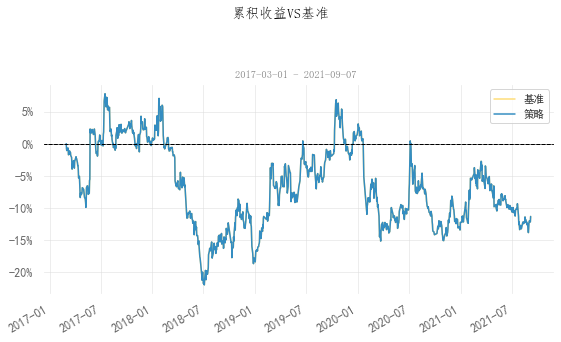

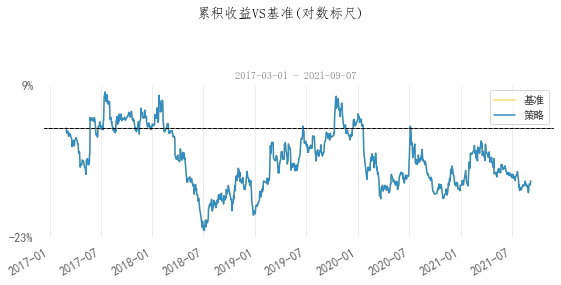

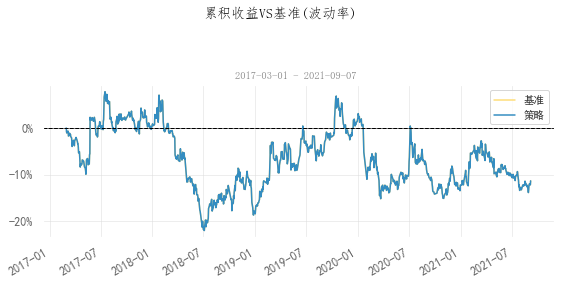

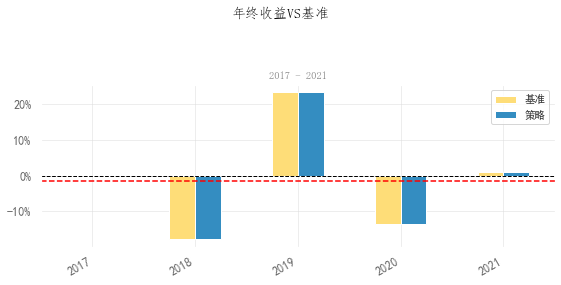

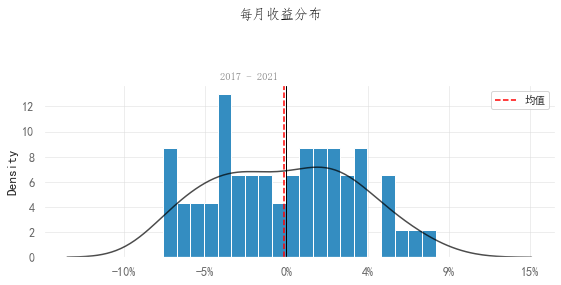

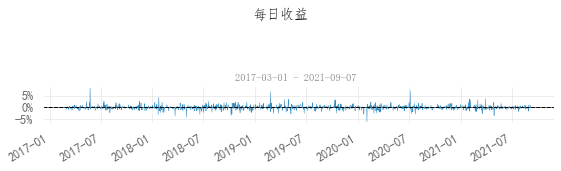

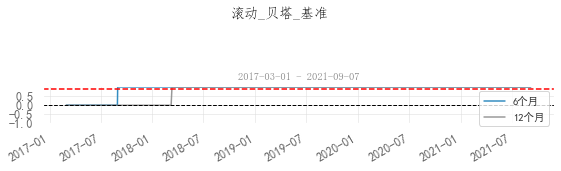

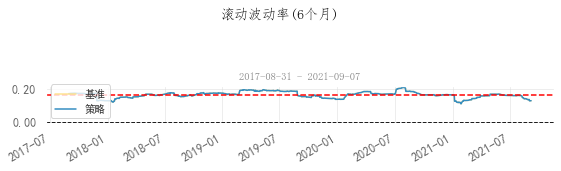

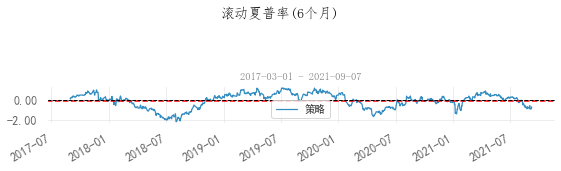

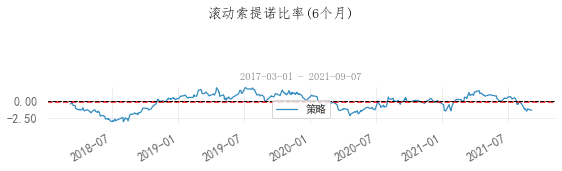

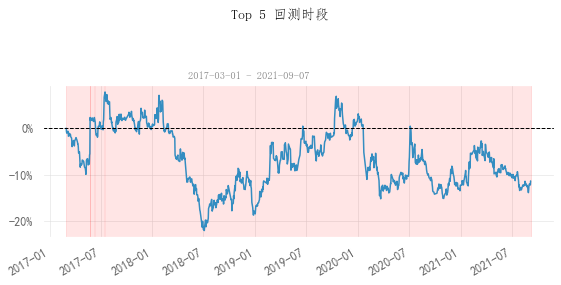

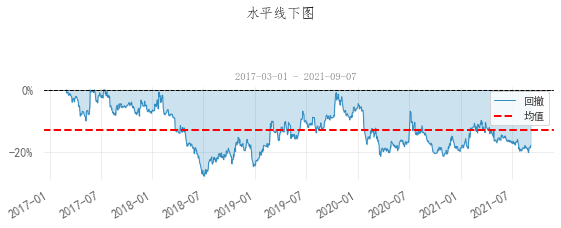

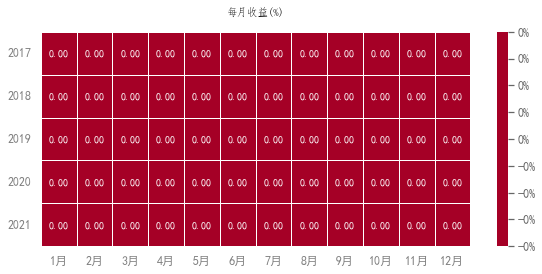

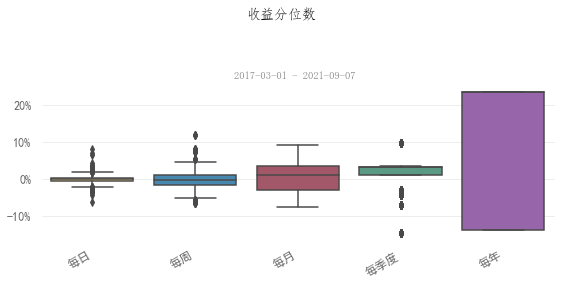

In [6]:
reports.full(stock, stock)

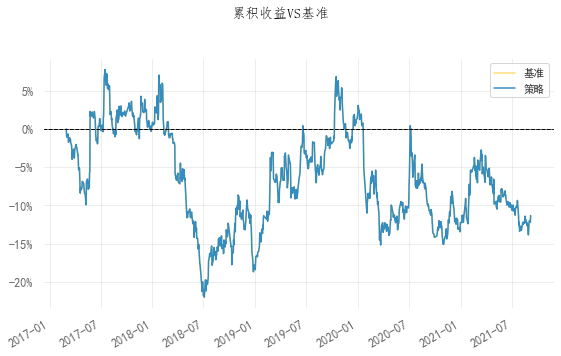

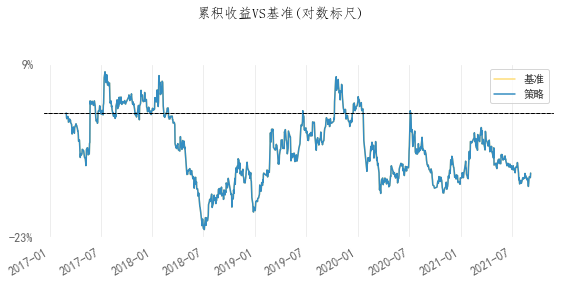

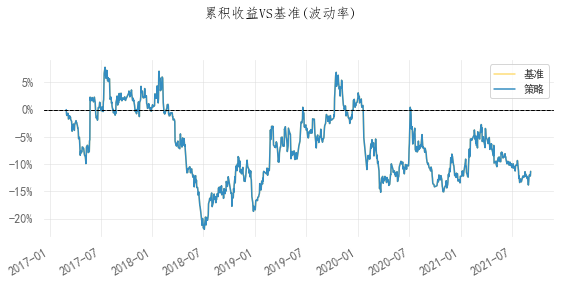

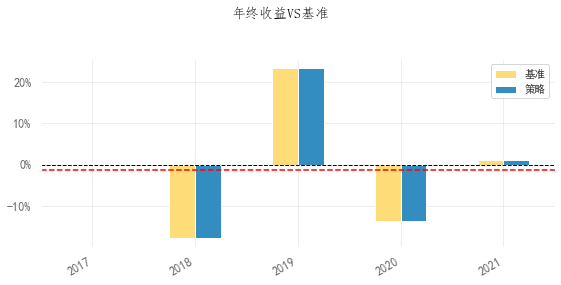

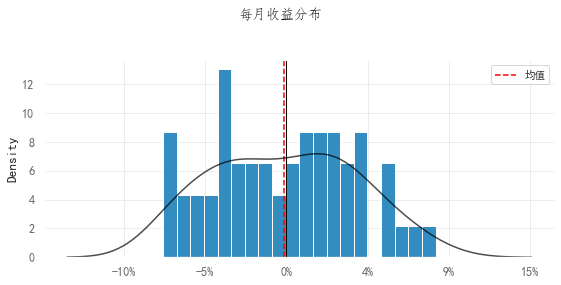

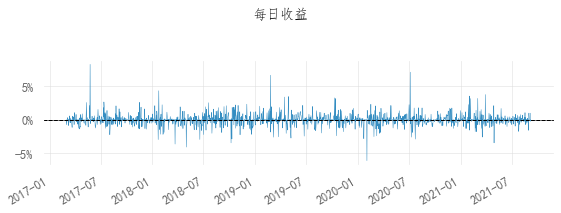

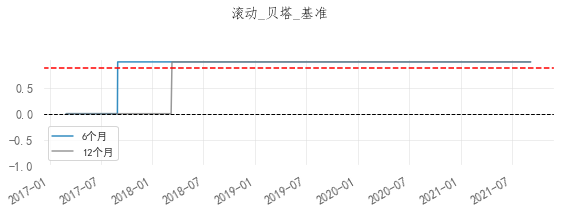

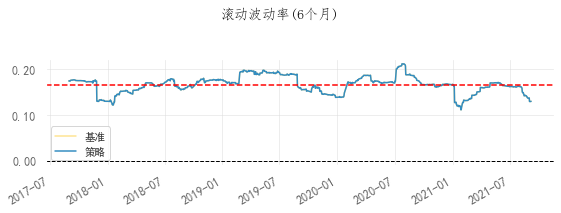

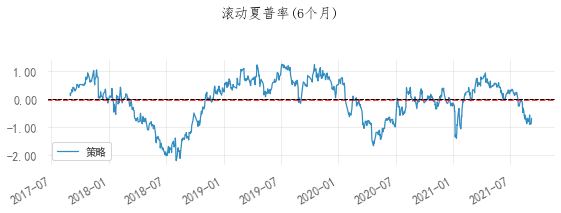

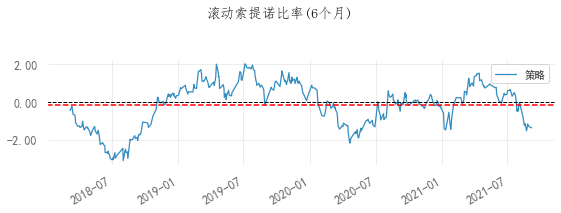

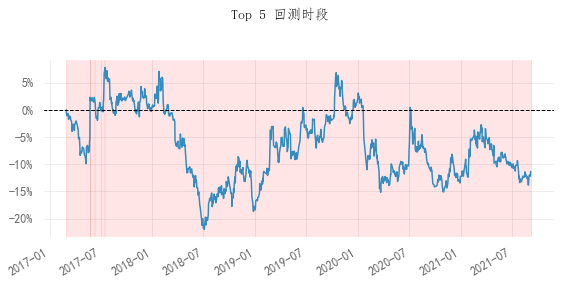

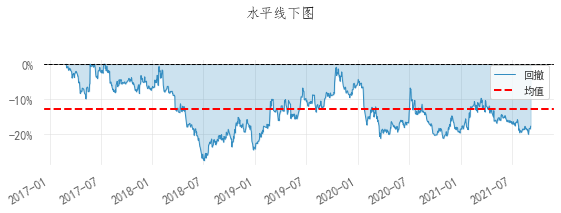

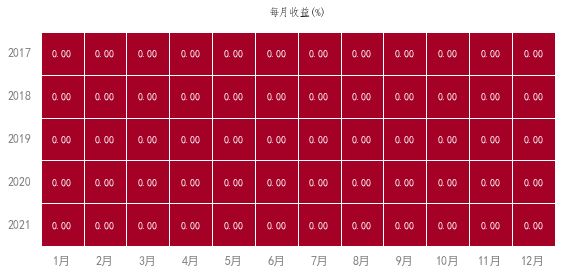

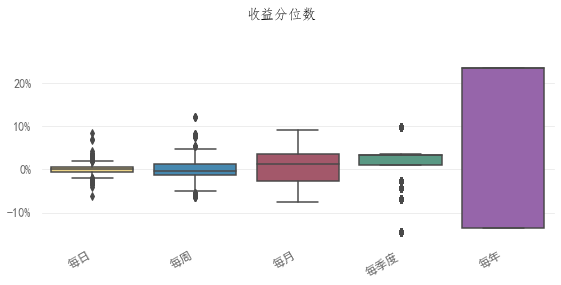

In [7]:
reports.html(stock, stock)

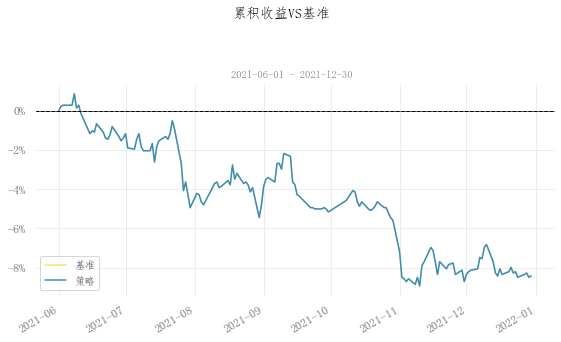

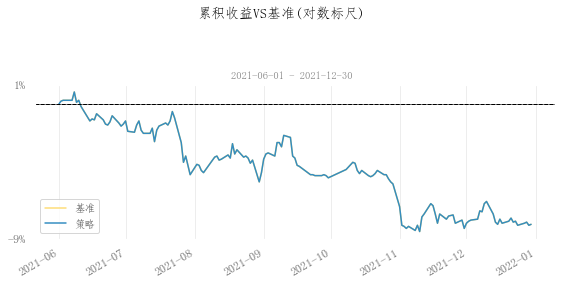

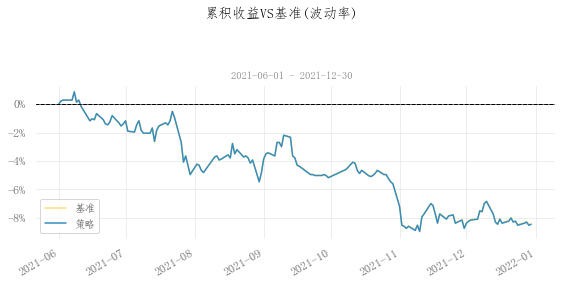

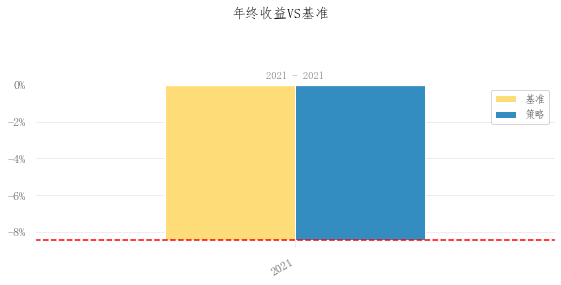

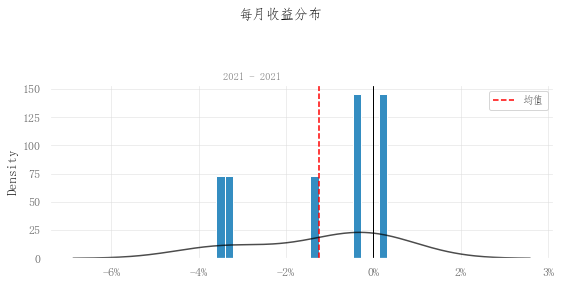

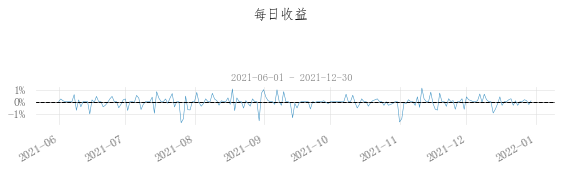

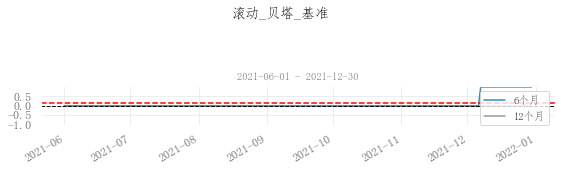

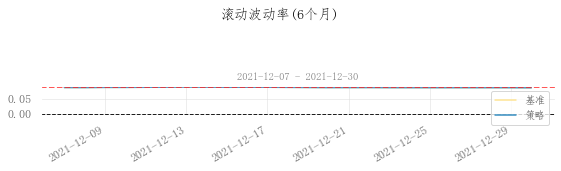

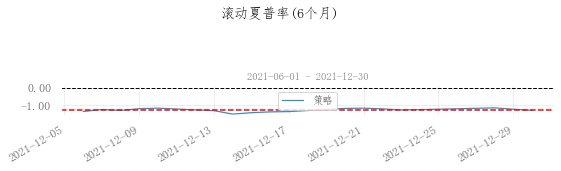

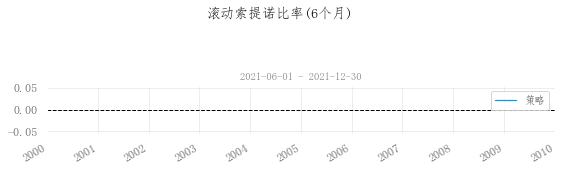

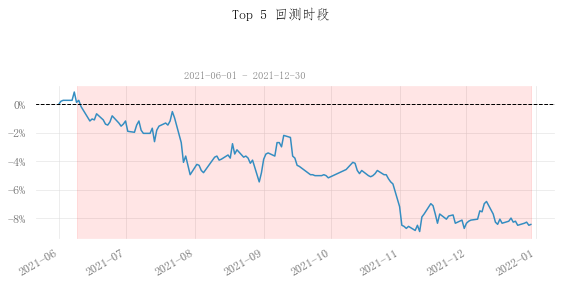

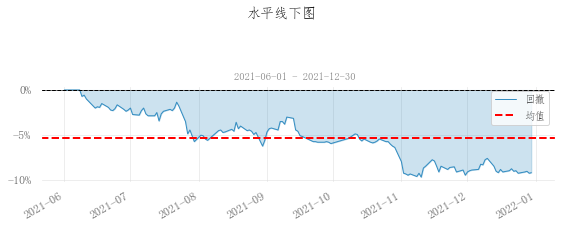

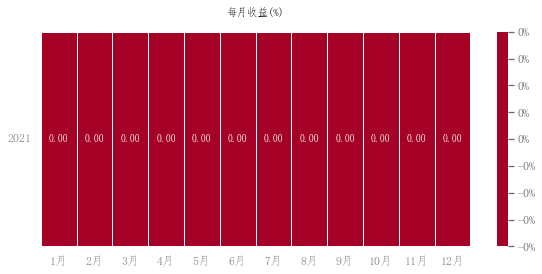

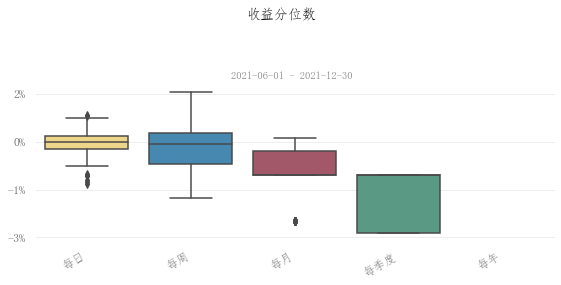

In [9]:
reports.plots(stock, benchmark=stock, mode="full")